***1.***

In [3]:
import re
import string
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'<.*?>', '', text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    processed_text = ' '.join(tokens)

    return processed_text
data = {
    'Review': [
        "This product is amazing! I'm so happy with it.",
        "It was okay, but I expected much better quality. <br> The instructions were confusing.",
        "The customer support was terrible! NEVER buying from them again.",
        "running ran runs easily"
    ],
    'Rating': [5, 3, 1, 4]
}
df = pd.DataFrame(data)

print("Original DataFrame")
print(df)
print("--" * 70)
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)

print("--- DataFrame After Preprocessing ---")
print(df[['Review', 'Cleaned_Review']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original DataFrame
                                              Review  Rating
0     This product is amazing! I'm so happy with it.       5
1  It was okay, but I expected much better qualit...       3
2  The customer support was terrible! NEVER buyin...       1
3                            running ran runs easily       4
--------------------------------------------------------------------------------------------------------------------------------------------
--- DataFrame After Preprocessing ---
                                              Review  \
0     This product is amazing! I'm so happy with it.   
1  It was okay, but I expected much better qualit...   
2  The customer support was terrible! NEVER buyin...   
3                            running ran runs easily   

                                      Cleaned_Review  
0                           product amazing im happy  
1  okay expected much better quality instruction ...  
2             customer support terrible never buyin

***2.***

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.probability import FreqDist
import math
import spacy
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

corpus = [
    "The food was excellent and the service was quick.",
    "Service was slow, but the waiters were polite.",
    "This dish is not good. I will never buy it again.",
]

tokenized_sentences = [word_tokenize(doc.lower()) for doc in corpus]

print("--- NLTK Feature Extraction ---")

all_words = [word for sentence in tokenized_sentences for word in sentence]

fdist = FreqDist(all_words)
vocabulary = list(fdist.keys())

print(f"1. BoW Vocabulary Size (Features): {len(vocabulary)}")
print(f"Top 5 BoW Features: {vocabulary[:5]}")
print(f"Frequency of 'service': {fdist['service']}")
print("--" * 70)

n_grams = []
n = 2
for sentence in tokenized_sentences:
    clean_sentence = [w for w in sentence if w.isalpha()]
    n_grams.extend(list(ngrams(clean_sentence, n)))

ngram_fdist = FreqDist(n_grams)

print(f"2. N-Gram Features ({n}-grams):")
print(f"Total Unique {n}-grams: {len(ngram_fdist)}")
print(f"Top 5 N-Grams and their Counts: {ngram_fdist.most_common(5)}")
print("--" * 70)

N = len(corpus)

df = {}
for word in vocabulary:
    df[word] = sum(1 for doc in corpus if word in doc)

word = 'excellent'

tf = fdist[word] / len(tokenized_sentences[0])

idf = math.log(N / (df[word] + 1))

tfidf_score = tf * idf

print(f"3. TF-IDF Score for '{word}' in Document 0 (Calculated Manually):")
print(f"  TF: {tf:.4f}, DF: {df[word]}, IDF: {idf:.4f}")
print(f"  TF-IDF Score: {tfidf_score:.4f}")
print("--" * 70)

print("4. Named Entity Recognition (NER):")
text_for_ner = "Apple Inc. CEO Tim Cook visited London on Tuesday."
tokenized = word_tokenize(text_for_ner)
tagged = nltk.pos_tag(tokenized)

tree = nltk.ne_chunk(tagged)

named_entities = []
for subtree in tree.subtrees():
    if hasattr(subtree, 'label') and subtree.label():
        entity = " ".join([leaf[0] for leaf in subtree.leaves()])
        named_entities.append((entity, subtree.label()))

print(f"Text: '{text_for_ner}'")
for entity, label in named_entities:
    print(f"  Entity: {entity}, Type: {label}")
print("--" * 70)

print("5. Word Embeddings (Input Preparation):")
print("NLTK provides the necessary input data structure to train embedding models:")
print(f"Required Input: {tokenized_sentences}")
print("This list of lists is directly fed into libraries like Gensim's Word2Vec model.")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


--- NLTK Feature Extraction ---
1. BoW Vocabulary Size (Features): 25
Top 5 BoW Features: ['the', 'food', 'was', 'excellent', 'and']
Frequency of 'service': 2
--------------------------------------------------------------------------------------------------------------------------------------------
2. N-Gram Features (2-grams):
Total Unique 2-grams: 24
Top 5 N-Grams and their Counts: [(('service', 'was'), 2), (('the', 'food'), 1), (('food', 'was'), 1), (('was', 'excellent'), 1), (('excellent', 'and'), 1)]
--------------------------------------------------------------------------------------------------------------------------------------------
3. TF-IDF Score for 'excellent' in Document 0 (Calculated Manually):
  TF: 0.1000, DF: 1, IDF: 0.4055
  TF-IDF Score: 0.0405
--------------------------------------------------------------------------------------------------------------------------------------------
4. Named Entity Recognition (NER):
Text: 'Apple Inc. CEO Tim Cook visited London o

***Qn 1***

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.1')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading omw-1.1: Package 'omw-1.1' not found in
[nltk_data]     index


False

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

file_path = "/content/sivakasi.txt"
with open(file_path, 'r') as file:
    text_corpus = file.read()

print(f"Original Text Corpus\n{text_corpus[:200].strip()}...\n")
print("--"*70)
#Pre-processing Steps
lower_text = text_corpus.lower()

#tokenization
raw_tokens = word_tokenize(lower_text)
print(raw_tokens[:30])
print("--"*70)

#spelling correction
blob = TextBlob(text_corpus)
corrected_text_corpus = str(blob.correct())
corrected_tokens = word_tokenize(corrected_text_corpus.lower()) # Re-tokenize the corrected text


print("\nCorrected Text Corpus")
print(corrected_text_corpus[:200].strip() + '...')
print("--"*70)

#POS tags
pos_tags = nltk.pos_tag(corrected_tokens)
print("POS Tags for Tokens")
print(pos_tags[:20])
print("--"*70)

#Remove stop words
stop_words = set(stopwords.words('english'))

#Filter alphanumeric and not in the stop words set
tokens_without_stopwords = [
    token for token in corrected_tokens
    if token.isalnum() and token not in stop_words
]

print("Tokens After Stop Word Removal")
print(tokens_without_stopwords[:20])
print("--"*70)

#stemming and lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_tokens = [stemmer.stem(token) for token in tokens_without_stopwords]
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens_without_stopwords]

print("Few Stemmed Tokens")
print(stemmed_tokens[:20])
print("--"*70)

print("\nFew Lemmatized Tokens")
print(lemmatized_tokens[:20])
print("--"*70)

#Detect sentence boundaries
sentences = sent_tokenize(corrected_text_corpus)
total_sentences = len(sentences)

print("Sentence Boundary Detection")
print(f"Total number of sentences: {total_sentences}\n")
print("Detected Sentences:")
for i, sentence in enumerate(sentences[:total_sentences]):
    print(f"Sentence {i+1}: {sentence.strip()}")
print("--"*70)

Original Text Corpus
It symbolises the victory of good over evil and light over darkness. People decorate their homes with lights, flowers and rangoli, wear new clothes, and exchange gifts. Special prayers are offered to...

--------------------------------------------------------------------------------------------------------------------------------------------
['it', 'symbolises', 'the', 'victory', 'of', 'good', 'over', 'evil', 'and', 'light', 'over', 'darkness', '.', 'people', 'decorate', 'their', 'homes', 'with', 'lights', ',', 'flowers', 'and', 'rangoli', ',', 'wear', 'new', 'clothes', ',', 'and', 'exchange']
--------------------------------------------------------------------------------------------------------------------------------------------

Corrected Text Corpus
It symbolized the victory of good over evil and light over darkness. People decorate their homes with lights, flowers and rangoli, wear new clothes, and exchange gifts. Special prayers are offered to...
----------

***Qn 2***

BoW - prioritizes extremely common terms.simply because they appear frequently.

TF-IDF - gives higher scores to words that are frequent in a few documents but rare across the entire corpus, which is a better indicator of topic-specific importance.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

pd.set_option('display.max_rows', None)

#Data Cleaning metadata
newsgroups = fetch_20newsgroups(
    subset='train',
    remove=('headers', 'footers', 'quotes'),
    shuffle=True,
    random_state=42
)

df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

print("Dataframe Head:")
print(df.head())
print(f"\nTotal documents loaded: {len(df)}")
print("--"*70)

#Remove documents - empty
df.replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)
print(f"Total documents after removing empty entries: {len(df)}")
print("--"*70)

#Create BoW (CountVectorizer)
count_vectorizer = CountVectorizer(stop_words='english')
bow_matrix = count_vectorizer.fit_transform(df['text'])

print(f"BoW Matrix shape: {bow_matrix.shape}")
print("--"*70)

#Create TF-IDF (TfidfVectorizer)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

print(f"TF-IDF Matrix shape: {tfidf_matrix.shape}")
print("--"*70)

#Counts of each word
bow_sums = np.sum(bow_matrix.toarray(), axis=0)

#DataFrame of words and its counts
bow_features = count_vectorizer.get_feature_names_out()
bow_df = pd.DataFrame({'Word': bow_features, 'Count': bow_sums})

# Sort by count in desc
bow_df_sorted = bow_df.sort_values(by='Count', ascending=False)
top_20_bow = bow_df_sorted.head(20).reset_index(drop=True)

print("Top 20 Most Frequent Words (BoW)")
print(top_20_bow)
print("--"*70)

#TF-IDF scores of each word across all documents
tfidf_sums = np.sum(tfidf_matrix.toarray(), axis=0)

#DataFrame of words and its TF-IDF scores
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame({'Word': tfidf_features, 'TF-IDF_Score': tfidf_sums})

# Sort by score in desc
tfidf_df_sorted = tfidf_df.sort_values(by='TF-IDF_Score', ascending=False)
top_20_tfidf = tfidf_df_sorted.head(20).reset_index(drop=True)

print("Top 20 Most Important Words (TF-IDF)")
print(top_20_tfidf)
print("--"*70)

print("COMPARISON:")
top_20_bow_set = set(top_20_bow['Word'])
tfidf_unique_to_top_20 = [
    word for word in top_20_tfidf['Word']
    if word not in top_20_bow_set
]

print(f"\nTotal unique features (words) extracted by BoW/TF-IDF: {len(bow_features)}")
print(f"Number of common words in both Top 20 lists: {20 - len(tfidf_unique_to_top_20)}")
print(f"Words present in TF-IDF Top 20 but NOT in BoW Top 20: {tfidf_unique_to_top_20}")

Dataframe Head:
                                                text  target
0  I was wondering if anyone out there could enli...       7
1  A fair number of brave souls who upgraded thei...       4
2  well folks, my mac plus finally gave up the gh...       4
3  \nDo you have Weitek's address/phone number?  ...       1
4  From article <C5owCB.n3p@world.std.com>, by to...      14

Total documents loaded: 11314
--------------------------------------------------------------------------------------------------------------------------------------------
Total documents after removing empty entries: 11096
--------------------------------------------------------------------------------------------------------------------------------------------
BoW Matrix shape: (11096, 101322)
--------------------------------------------------------------------------------------------------------------------------------------------
TF-IDF Matrix shape: (11096, 101322)
-----------------------------------------

***Qn 3***

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


--- Original Data ---
                                          reviewText  Overall
0  Not much to write about here, but it does exac...        5
1  The product does exactly as it should and is q...        4
2  The primary job of this device is to block the...        3
3  Nice windscreen protects my MXL mic and preven...        5
4  This pop filter is great. It looks and perform...        4
5   So good that I bought another one. Love the h...        4
6  I have used monster cables for years, and with...        5
7  I now use this cable to run from the output of...        5
8   Perfect for my Epiphone Sheraton II. Monster ...        3
9  Monster makes the best cables and a lifetime w...        4

--- Cleaned Data ---
                                          reviewText  \
0  Not much to write about here, but it does exac...   
1  The product does exactly as it should and is q...   
2  The primary job of this device is to block the...   
3  Nice windscreen protects my MXL mic and preven.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:51:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: Random Forest Regressor
  R-squared: -4.3264, Mean Squared Error (MSE): 1.3316
Model: Gradient Boosting Regressor
  R-squared: -3.5213, Mean Squared Error (MSE): 1.1303
Model: XGB Regressor
  R-squared: -5.0042, Mean Squared Error (MSE): 1.5011



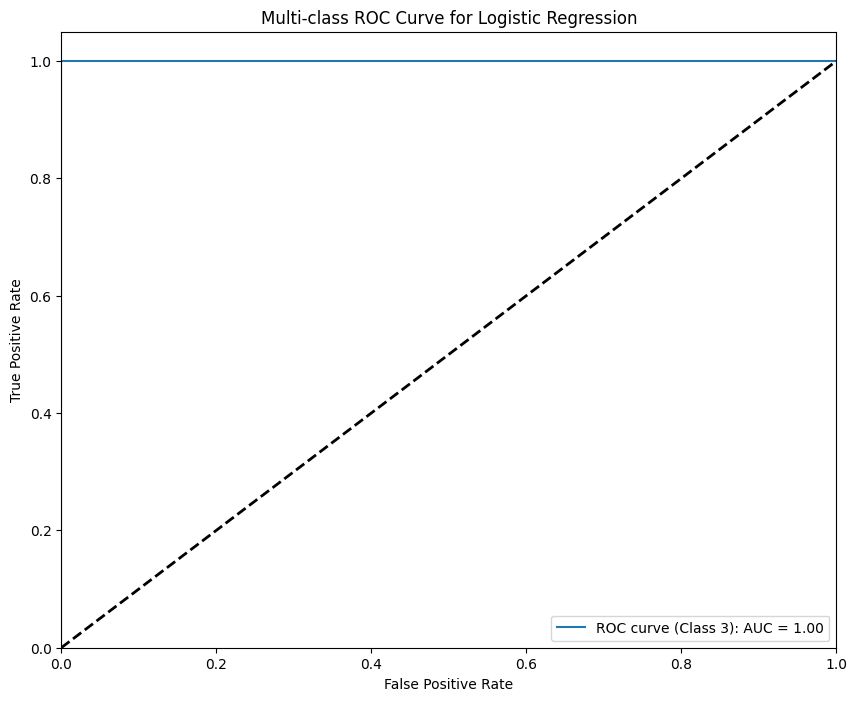

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')


data = {
    'reviewText': [
        "Not much to write about here, but it does exac...",
        "The product does exactly as it should and is q...",
        "The primary job of this device is to block the...",
        "Nice windscreen protects my MXL mic and preven...",
        "This pop filter is great. It looks and perform...",
        "So good that I bought another one. Love the h...",
        "I have used monster cables for years, and with...",
        "I now use this cable to run from the output of...",
        "Perfect for my Epiphone Sheraton II. Monster ...",
        "Monster makes the best cables and a lifetime w...",
    ],
    'Overall': [5, 4, 3, 5, 4, 4, 5, 5, 3, 4]
}
df = pd.DataFrame(data)

print("--- Original Data ---")
print(df)
print("\n" + "="*80)



lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()

    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]


    return " ".join(tokens)

df['cleaned_review'] = df['reviewText'].apply(clean_text)

print("--- Cleaned Data ---")
print(df[['reviewText', 'cleaned_review', 'Overall']])
print("\n" + "="*80)

X = df['cleaned_review']
y_class = df['Overall']
y_reg = df['Overall']

unique_classes = sorted(y_class.unique())
class_mapping = {cls: i for i, cls in enumerate(unique_classes)}
y_class_mapped = y_class.map(class_mapping)



tfidf_vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

print(f"TF-IDF Feature Matrix Shape: {X_tfidf.shape}")
print(f"Sample Features (Vocabulary): {list(tfidf_vectorizer.vocabulary_.keys())[:10]}")
print("\n" + "="*80)

X_train, X_test, y_train_class_mapped, y_test_class_mapped = train_test_split(
    X_tfidf, y_class_mapped, test_size=0.2, random_state=42
)

_, _, y_train_reg, y_test_reg = train_test_split(
    X_tfidf, y_reg, test_size=0.2, random_state=42
)

classification_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multinomial Naive Bayes': MultinomialNB(),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=min(3, len(np.unique(y_train_class_mapped)))), # Small dataset requires careful neighbor choice
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting (GBM)': GradientBoostingClassifier(random_state=42),
    'XGBoost Classifier': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42)
}

results_class = {}
fpr_tpr_data = {}

print("--- CLASSIFICATION MODEL RESULTS ---")
for name, model in classification_models.items():

    model.fit(X_train, y_train_class_mapped)

    y_pred = model.predict(X_test)
    y_proba = None
    if hasattr(model, 'predict_proba'):
        try:
            y_proba = model.predict_proba(X_test)
        except AttributeError:

            pass


    accuracy = accuracy_score(y_test_class_mapped, y_pred)
    precision = precision_score(y_test_class_mapped, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_class_mapped, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_class_mapped, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test_class_mapped, y_pred)

    results_class[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': cm
    }

    print(f"\nModel: {name}")
    print(f"  Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print(f"  Confusion Matrix:\n{cm}")

    if name == 'Logistic Regression' and len(y_test_class_mapped.unique()) > 1:
        fpr_tpr_data[name] = y_proba

print("\n" + "="*80)

from sklearn.metrics import mean_squared_error

print("--- REGRESSION MODEL RESULTS (R-squared and MSE) ---")
for name, model in regression_models.items():
    model.fit(X_train, y_train_reg)
    y_pred_reg = model.predict(X_test)

    r2 = model.score(X_test, y_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)

    print(f"Model: {name}")
    print(f"  R-squared: {r2:.4f}, Mean Squared Error (MSE): {mse:.4f}")

print("\n" + "="*80)


if fpr_tpr_data:
    plt.figure(figsize=(10, 8))

    model_name = 'Logistic Regression'
    y_proba = fpr_tpr_data[model_name]

    all_classes = sorted(df['Overall'].unique())
    n_classes = len(all_classes)

    from sklearn.preprocessing import label_binarize
    y_test_bin = label_binarize(y_test_class_mapped, classes=np.unique(y_test_class_mapped))

    for i in range(y_test_bin.shape[1]):

        if len(np.unique(y_test_bin[:, i])) > 1:

            original_class = list(class_mapping.keys())[list(class_mapping.values()).index(np.unique(y_test_class_mapped)[i])]

            class_index_in_proba = list(classification_models[model_name].classes_).index(np.unique(y_test_class_mapped)[i])
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, class_index_in_proba])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'ROC curve (Class {original_class}): AUC = {roc_auc:.2f}')
        else:
            original_class = list(class_mapping.keys())[list(class_mapping.values()).index(np.unique(y_test_class_mapped)[i])]
            print(f"Skipping ROC plot for Class {original_class} due to insufficient samples in test set.")


    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-class ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

***Qn 4***

First 5 rows:
                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0

DataFrame columns: ['text', 'label']
--------------------------------------------------------------------------------------------------------------------------------------------

First 5 cleaned entries:
                                        cleaned_text
0  I always wrote this series off as being a comp...
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...
2  This movie was so poorly written and directed ...
3  The most interesting thing about Miryang (Secr...
4  when i first read about "berlin am meer" i did...
-------------------------------------------------------------------------------------------------------

/tmp/ipython-input-3265247111.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


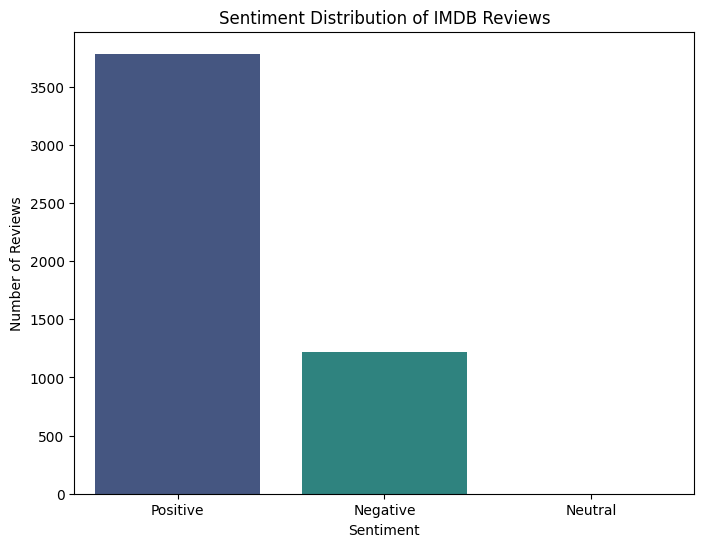

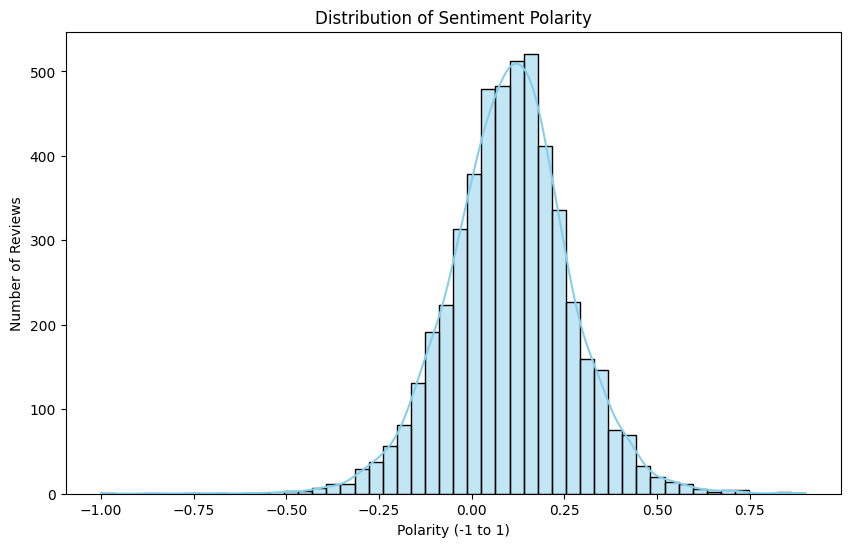

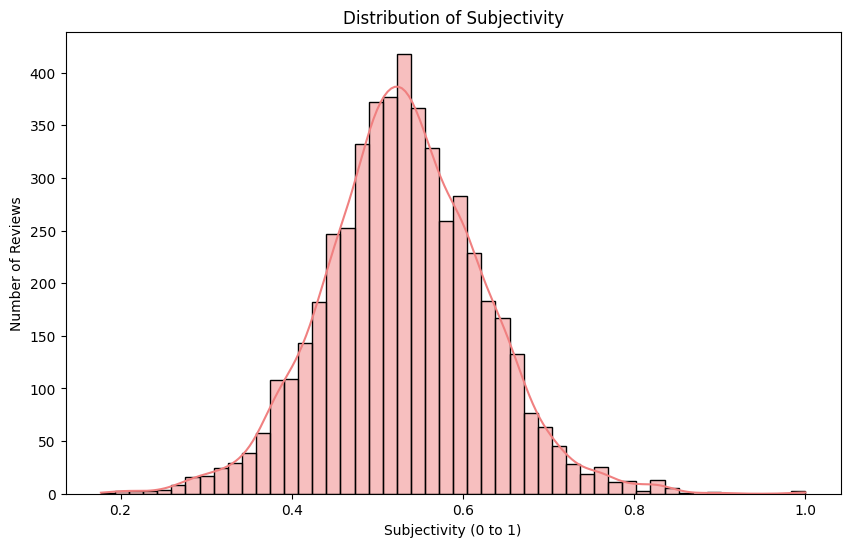

In [ ]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

CSV_FILE_NAME = '/content/Test.csv'
TEXT_COLUMN = 'text'
df = pd.read_csv(CSV_FILE_NAME)
print("First 5 rows:")
print(df.head())
print(f"\nDataFrame columns: {df.columns.tolist()}")
print('--'*70)

if TEXT_COLUMN not in df.columns:
    print(f"Error: The column '{TEXT_COLUMN}' was not found in the DataFrame.")
    print(f"Available columns are: {df.columns.tolist()}")
    print("Please update the 'TEXT_COLUMN' variable in the script to match your CSV file.")
    exit()

df_text = df[[TEXT_COLUMN]].copy()

def remove_handles(text):
    if not isinstance(text, str):
        return ""
    text_without_handles = re.sub(r'@\w+', '', text)
    return text_without_handles.strip() #removes whitespace

df_text['cleaned_text'] = df_text[TEXT_COLUMN].apply(remove_handles)

print("\nFirst 5 cleaned entries:")
print(df_text[['cleaned_text']].head())
print('--'*70)

def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0.0, 0.0
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

df_text[['polarity', 'subjectivity']] = df_text['cleaned_text'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_text['sentiment'] = df_text['polarity'].apply(classify_sentiment)

print("\nDataFrame with sentiment analysis results (first 5 rows):")
print(df_text.head())
print('--'*70)

df = df.join(df_text[['polarity', 'subjectivity', 'sentiment', 'cleaned_text']])

print("\nOriginal DataFrame joined with sentiment results (first 5 rows):")
print(df.head())
print('--'*70)

print("\n--- Positive Reviews (first 5) ---")
positive_reviews = df[df['sentiment'] == 'Positive']
print(positive_reviews[[TEXT_COLUMN, 'sentiment']].head())
print(f"Total positive reviews: {len(positive_reviews)}")
print('--'*70)

print("\n--- Negative Reviews (first 5) ---")
negative_reviews = df[df['sentiment'] == 'Negative']
print(negative_reviews[[TEXT_COLUMN, 'sentiment']].head())
print(f"Total negative reviews: {len(negative_reviews)}")
print('--'*70)

print("\n--- Neutral Reviews (first 5) ---")
neutral_reviews = df[df['sentiment'] == 'Neutral']
print(neutral_reviews[[TEXT_COLUMN, 'sentiment']].head())
print(f"Total neutral reviews: {len(neutral_reviews)}")
print('--'*70)

print("\n--- Sentiment Distribution ---")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
print('--'*70)

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of IMDB Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity (-1 to 1)')
plt.ylabel('Number of Reviews')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity (0 to 1)')
plt.ylabel('Number of Reviews')
plt.show()